In [1]:
import torch
from torchvision.transforms import ToPILImage
from dalle2_pytorch import DALLE2
from dalle2_pytorch.train_configs import TrainDiffusionPriorConfig, TrainDecoderConfig

### Trying DALLE2

In [6]:
prior_config = TrainDiffusionPriorConfig.from_json_path("weights/prior_config.json").prior
prior = prior_config.create()

prior_model_state = torch.load("weights/prior_latest.pth", map_location=torch.device('cuda'))
prior.load_state_dict(prior_model_state, strict=True)

decoder_config = TrainDecoderConfig.from_json_path("weights/decoder_config.json").decoder
decoder = decoder_config.create()

decoder_model_state = torch.load("weights/decoder_latest.pth", map_location=torch.device('cuda'))["model"]

for k in decoder.clip.state_dict().keys():
    decoder_model_state["clip." + k] = decoder.clip.state_dict()[k]
 
decoder.load_state_dict(decoder_model_state, strict=True)

dalle2 = DALLE2(prior=prior, decoder=decoder).cuda()

In [7]:
images = dalle2(
    ['a red car'],
    cond_scale = 2.
).cpu()

for img in images:
    img = ToPILImage()(img)
    img.show()

sampling loop time step:   0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/bicdan22/snap/code/common/.cache/gio-modules/libgiolibproxy.so
eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE


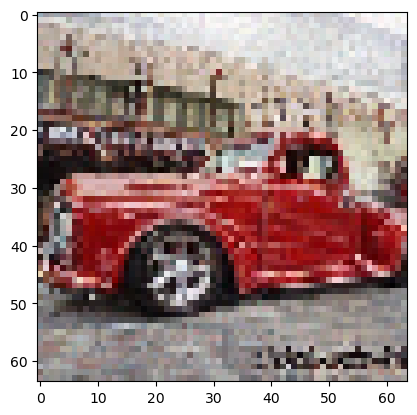

In [14]:
import matplotlib.pyplot as plt

plt.imshow(images[0].permute(1, 2, 0))

In [15]:
images = dalle2(
    ['a red cat sitting on a white dog'],
    cond_scale = 2.
).cpu()

for img in images:
    img = ToPILImage()(img)
    img.show()

sampling loop time step:   0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/bicdan22/snap/code/common/.cache/gio-modules/libgiolibproxy.so


eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE


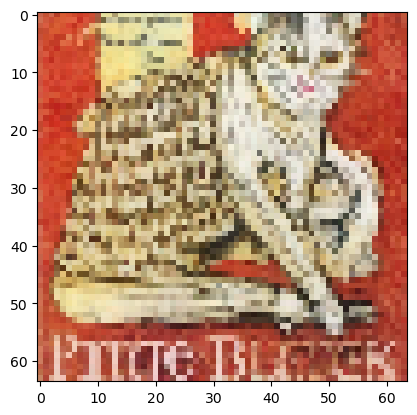

In [16]:
plt.imshow(images[0].permute(1, 2, 0))

### Trying laion

In [17]:
from dalle2_laion import ModelLoadConfig, DalleModelManager
from dalle2_laion.scripts import InferenceScript

In [22]:
class ExampleInference(InferenceScript):
    def run(self, text: str):
        """
        Takes a string and returns a single image.
        """
        text = [text]
        image_embedding_map = self._sample_prior(text)
        image_embedding = image_embedding_map[0][0]
        image_map = self._sample_decoder(text=text, image_embed=image_embedding)
        return image_map[0][0]

model_config = ModelLoadConfig.from_json_path("weights/gradio.example.json")
model_manager = DalleModelManager(model_config)
inference = ExampleInference(model_manager)
image = inference.run("Hello World")

FIX: Switch to this version with `pip install DALLE2-pytorch==1.1.0`. If different models suggest different versions, you may just need to choose one.


sampling loop time step:   0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x10 and 768x1280)